# Menggunakan Library Tensorflow

In [30]:
import tensorflow as tf ##jika error,  install tensorflow terlebih dahulu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import random

seed_value = 84
tf.random.set_seed(seed_value) 
np.random.seed(seed_value)      
random.seed(seed_value)  

In [31]:
fashion_mnist = tf.keras.datasets.fashion_mnist  
                                                 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [35]:
test_images.shape

(10000, 28, 28)

In [36]:
len(test_labels)

10000

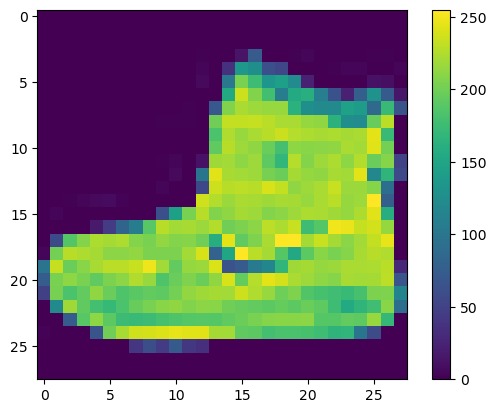

In [37]:
plt.figure() 
plt.imshow(train_images[0]) 
plt.colorbar() 
plt.grid(False)
plt.show() 

In [38]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255

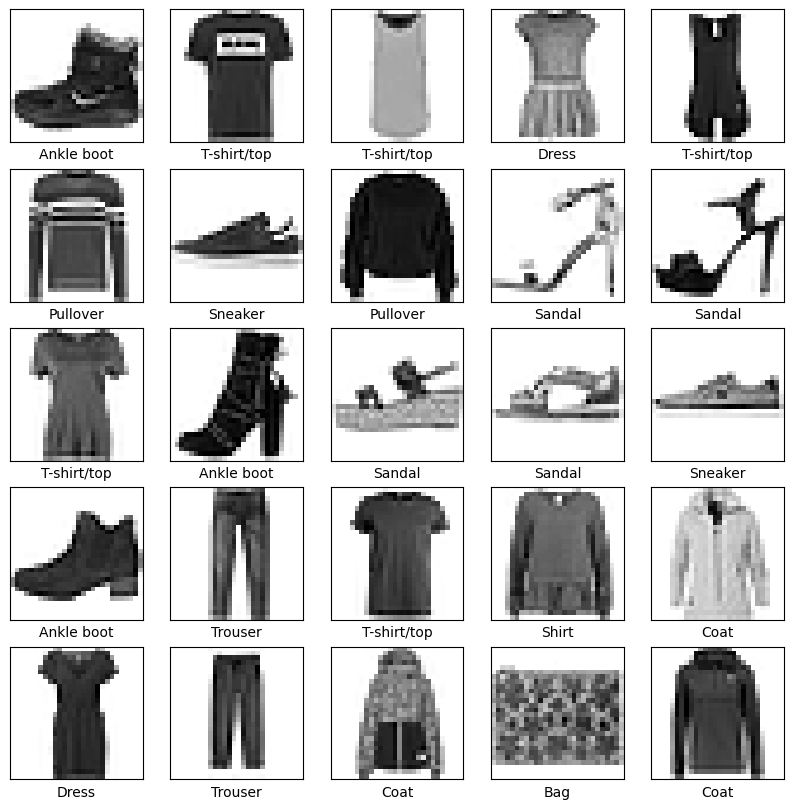

In [39]:
plt.figure(figsize=(10,10)) 
for i in range(25): 
    plt.subplot(5,5,i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[train_labels[i]]) 
plt.show()

In [40]:
model_tf = tf.keras.Sequential([ 
    tf.keras.layers.Input(shape=(28,28)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300, activation='relu'),  
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])


In [41]:
model_tf.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])  

In [42]:
from keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True  
)


history = model_tf.fit(
    train_images, train_labels,
    epochs=40,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]  
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7318 - loss: 0.7361 - val_accuracy: 0.8415 - val_loss: 0.4362
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8361 - loss: 0.4522 - val_accuracy: 0.8537 - val_loss: 0.4084
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8497 - loss: 0.4114 - val_accuracy: 0.8612 - val_loss: 0.3840
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8580 - loss: 0.3915 - val_accuracy: 0.8654 - val_loss: 0.3755
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8626 - loss: 0.3745 - val_accuracy: 0.8718 - val_loss: 0.3655
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8674 - loss: 0.3605 - val_accuracy: 0.8700 - val_loss: 0.3633
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8712 - loss: 0.3499 - val_accuracy: 0.8714 - val_loss: 0.3579
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8747 - loss: 0.3418 - 

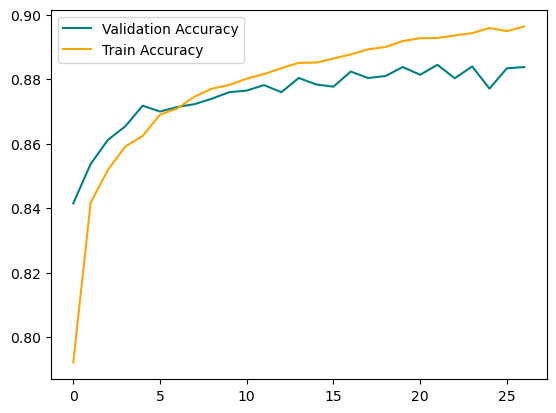

In [43]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal',label='Validation Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')  
plt.legend(loc="upper left")
plt.show()

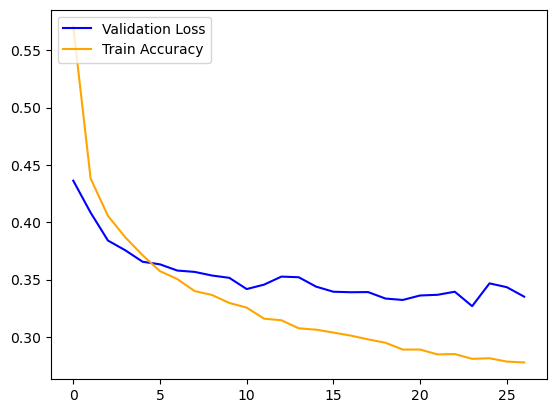

In [44]:
fig = plt.figure()
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.plot(history.history['loss'], color = 'orange', label='Train Accuracy')  
plt.legend(loc="upper left")
plt.show()

In [45]:
test_loss, test_acc_tf = model_tf.evaluate(test_images, test_labels, verbose=2) 
                                                                                
print('\nTest accuracy:', test_acc_tf) 

313/313 - 0s - 439us/step - accuracy: 0.8845 - loss: 0.3367

Test accuracy: 0.8845000267028809


In [46]:
probability_model = tf.keras.Sequential([model_tf, 
                                         tf.keras.layers.Softmax()])

In [47]:
predictions_tf = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


In [48]:
predictions_tf[0]

array([9.8951375e-11, 1.7837239e-10, 1.9702877e-09, 3.0981371e-09,
       2.9781995e-09, 3.1570475e-05, 4.0211406e-10, 2.6849352e-03,
       7.8729474e-11, 9.9728346e-01], dtype=float32)

In [49]:
np.argmax(predictions_tf[0])

9

In [50]:
test_labels[0]

9

In [51]:
def plot_image(i, predictions_array, true_label, img):  
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Pastikan hanya memplot satu gambar
    img = img[i].squeeze()  # Menghilangkan dimensi ekstra jika ada
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label[i]:
        color = 'blue'
    else:
        color = 'red'

    # Format label dengan nama kelas
    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],  # Predicted class
            100 * np.max(predictions_array),  # Probability
            class_names[true_label[i]]  # True class
        ),
        color=color
    )

def plot_value_array(i, predictions_array, true_label): 
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[i]].set_color('blue')

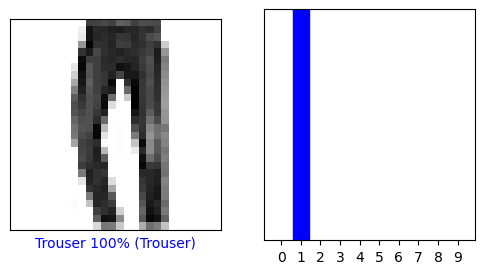

In [52]:
i=5
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions_tf[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions_tf[i], test_labels)
plt.show()

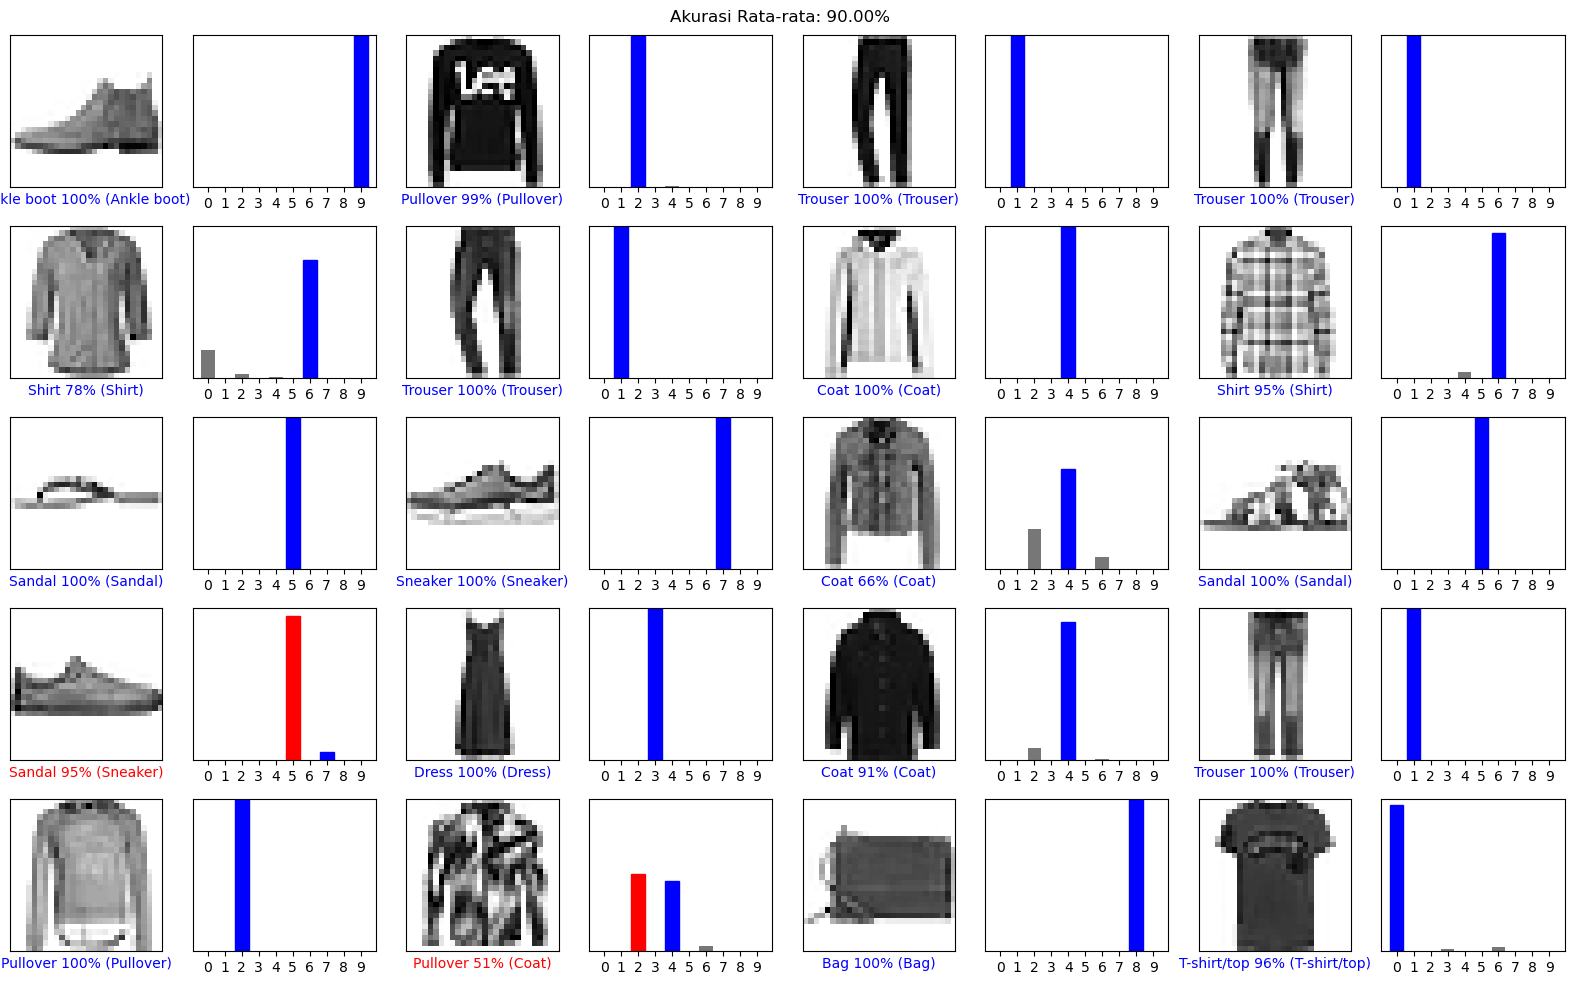

In [53]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_tf[i]) == test_labels[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100  

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_tf[i], test_labels, test_images)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_tf[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

In [54]:
img = test_images[1] 

print(img.shape)

(28, 28, 1)


In [55]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [56]:
predictions_single = probability_model.predict(img) 
print(predictions_single) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[1.52401059e-04 3.38504585e-10 9.92211103e-01 4.58279803e-10
  5.66585967e-03 1.23402206e-14 1.97071116e-03 6.72497394e-21
  4.55769936e-11 1.00262820e-16]]


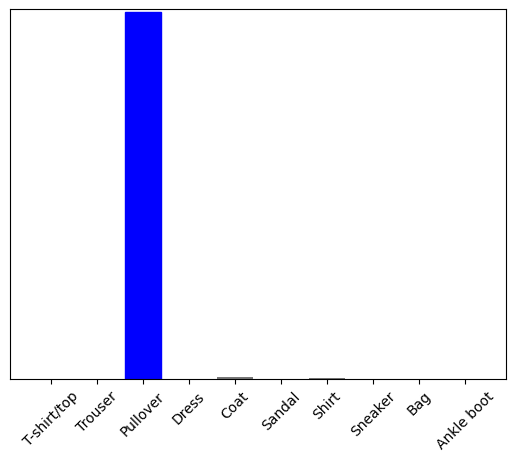

In [57]:
plot_value_array(1, predictions_single[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45) 
plt.show()

In [58]:
np.argmax(predictions_single[0]) 

2

In [59]:
df_test = pd.DataFrame({
    'Target': test_labels,  
    'Predicted': np.argmax(predictions_tf, axis=1),  
    'Proba_0': predictions_tf[:, 0],  
    'Proba_1': predictions_tf[:, 1]  
})

pixels = test_images.reshape(len(test_images), -1)

df_pixels = pd.DataFrame(pixels, columns=[f'pixel{i+1}' for i in range(28*28)])

df_test = pd.concat([df_test, df_pixels], axis=1)

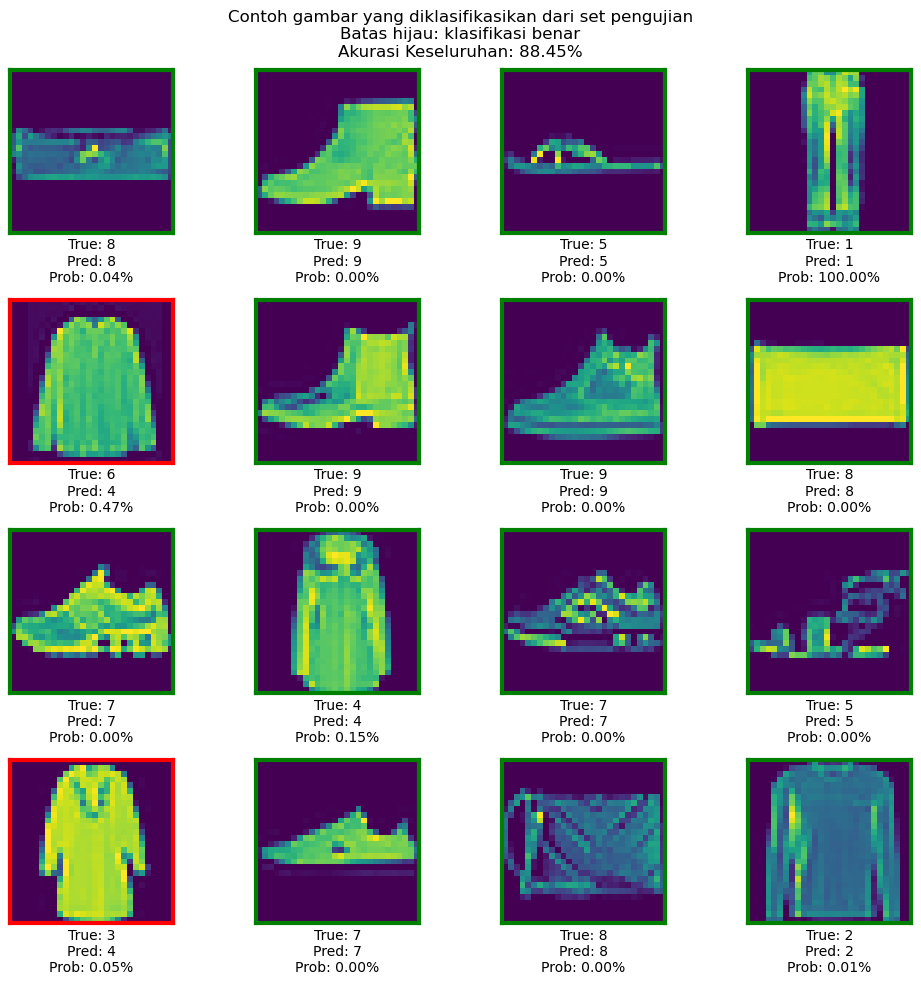

In [60]:
df_plot = df_test.sample(16, random_state=84).copy()
fig, ax = plt.subplots(4, 4, figsize=(10, 10))

rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]

    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100

    true_class = df_plot['Target'].values[i]

    pixels = df_plot[[f'pixel{j}' for j in range(1, 28*28 + 1)]].values[i].reshape(28, 28)
    axi.imshow(pixels, cmap='viridis')
    
    axi.set(xticks=[], yticks=[],
        xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%")

    edge_color = 'green' if predicted_class == true_class else 'red'
    axi.spines[:].set_edgecolor(edge_color)
    axi.spines[:].set_linewidth(3)


fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')
fig.tight_layout()
plt.show()

# Menggunakan Library Scikit-Learn

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
import seaborn as sns

In [62]:
import warnings
warnings.filterwarnings("ignore");
warnings.simplefilter("ignore");

In [63]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml('Fashion-MNIST',version=1)

train_images = fashion_mnist.data[:60000] 
train_labels = fashion_mnist.target[:60000].astype(int)  
test_images = fashion_mnist.data[60000:]
test_labels = fashion_mnist.target[60000:].astype(int)  

In [64]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import train_test_split
import numpy as np

train_images_split, val_images, train_labels_split, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=84
)

model_sklearn = MLPClassifier(hidden_layer_sizes=(128, 300),
                      activation='relu',
                      alpha=0.0001,
                      learning_rate_init=0.001,
                      early_stopping=True,
                      validation_fraction=0.2,
                      n_iter_no_change=10,
                      random_state=84,
                              
                      verbose=True)

model_sklearn.fit(train_images_split, train_labels_split)
training_loss = model_sklearn.loss_curve_

Iteration 1, loss = 0.63616622
Validation score: 0.814479
Iteration 2, loss = 0.42356234
Validation score: 0.851042
Iteration 3, loss = 0.37600745
Validation score: 0.865938
Iteration 4, loss = 0.34738260
Validation score: 0.866354
Iteration 5, loss = 0.32210153
Validation score: 0.879167
Iteration 6, loss = 0.30560784
Validation score: 0.874896
Iteration 7, loss = 0.28823862
Validation score: 0.885521
Iteration 8, loss = 0.27497981
Validation score: 0.885208
Iteration 9, loss = 0.26159936
Validation score: 0.879479
Iteration 10, loss = 0.25369497
Validation score: 0.882812
Iteration 11, loss = 0.24620253
Validation score: 0.890625
Iteration 12, loss = 0.23732933
Validation score: 0.890104
Iteration 13, loss = 0.23264901
Validation score: 0.884687
Iteration 14, loss = 0.22029706
Validation score: 0.891563
Iteration 15, loss = 0.21205330
Validation score: 0.888229
Iteration 16, loss = 0.20394500
Validation score: 0.891458
Iteration 17, loss = 0.19778550
Validation score: 0.886354
Iterat

Iteration 1, loss = 1.42363149
Validation score: 0.685417
Iteration 2, loss = 0.70563982
Validation score: 0.737500
Iteration 1, loss = 1.08075139
Validation score: 0.772917
Iteration 3, loss = 0.59164627
Validation score: 0.769792
Iteration 1, loss = 0.92640716
Validation score: 0.793056
Iteration 4, loss = 0.55450780
Validation score: 0.772917
Iteration 2, loss = 0.60256248
Validation score: 0.815104
Iteration 5, loss = 0.49646803
Iteration 1, loss = 0.82954550
Validation score: 0.788542
Validation score: 0.798958
Iteration 6, loss = 0.46495609
Validation score: 0.765625
Iteration 3, loss = 0.51696461
Validation score: 0.831250
Iteration 1, loss = 0.78811394
Iteration 7, loss = 0.43071229
Iteration 2, loss = 0.53471638
Validation score: 0.811458
Validation score: 0.817014
Validation score: 0.793125
Iteration 8, loss = 0.39780766
Validation score: 0.833333
Iteration 1, loss = 0.74375360
Iteration 4, loss = 0.47849355
Validation score: 0.824479
Validation score: 0.798611
Iteration 9, l

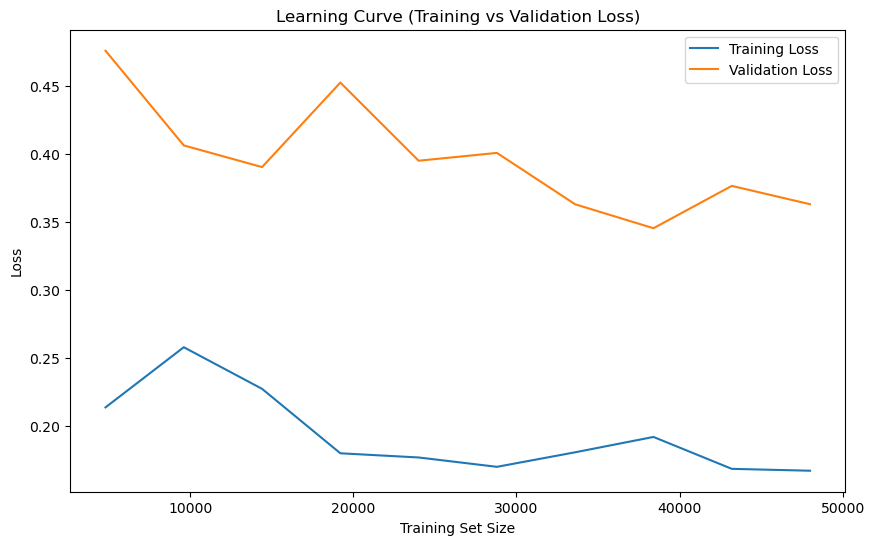

In [66]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model_sklearn,train_images, train_labels, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='neg_log_loss', random_state=84, n_jobs=-1)

train_loss_mean = -train_scores.mean(axis=1)
val_loss_mean = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_loss_mean, label='Training Loss')
plt.plot(train_sizes, val_loss_mean, label='Validation Loss')
plt.xlabel('Training Set Size')
plt.ylabel('Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.show()


In [67]:
test_predictions = model_sklearn.predict(test_images)
test_acc_sklearn = accuracy_score(test_labels, test_predictions)

print('\nTest accuracy:', test_acc_sklearn)


Test accuracy: 0.887


In [68]:
print("\nClassifications Report:\n", classification_report(test_labels, test_predictions))

predictions_proba = model_sklearn.predict_proba(test_images)


Classifications Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.79      0.82      0.80      1000
           3       0.88      0.90      0.89      1000
           4       0.79      0.86      0.82      1000
           5       0.97      0.96      0.97      1000
           6       0.79      0.62      0.69      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [69]:
predictions_sklearn = model_sklearn.predict_proba(test_images)
print(predictions_sklearn[0])  

print("Predicted label for first image : ", np.argmax(predictions_sklearn[0]))

print("Actual label for first image : ", test_labels.iloc[0])

[5.64442525e-11 5.47828768e-11 7.58079918e-11 2.97675609e-11
 5.51112178e-10 8.91384002e-07 1.49251292e-09 3.56008471e-04
 1.01933157e-09 9.99643097e-01]
Predicted label for first image :  9
Actual label for first image :  9


In [70]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28) 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i] 
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#7777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


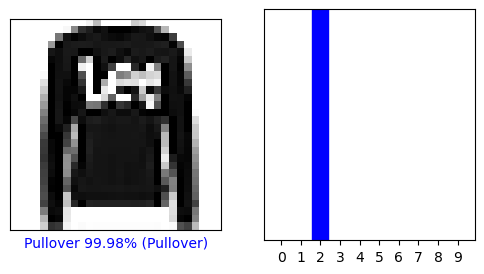

In [71]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions_sklearn[i] ,test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i,predictions_sklearn[i], test_labels)
plt.show()


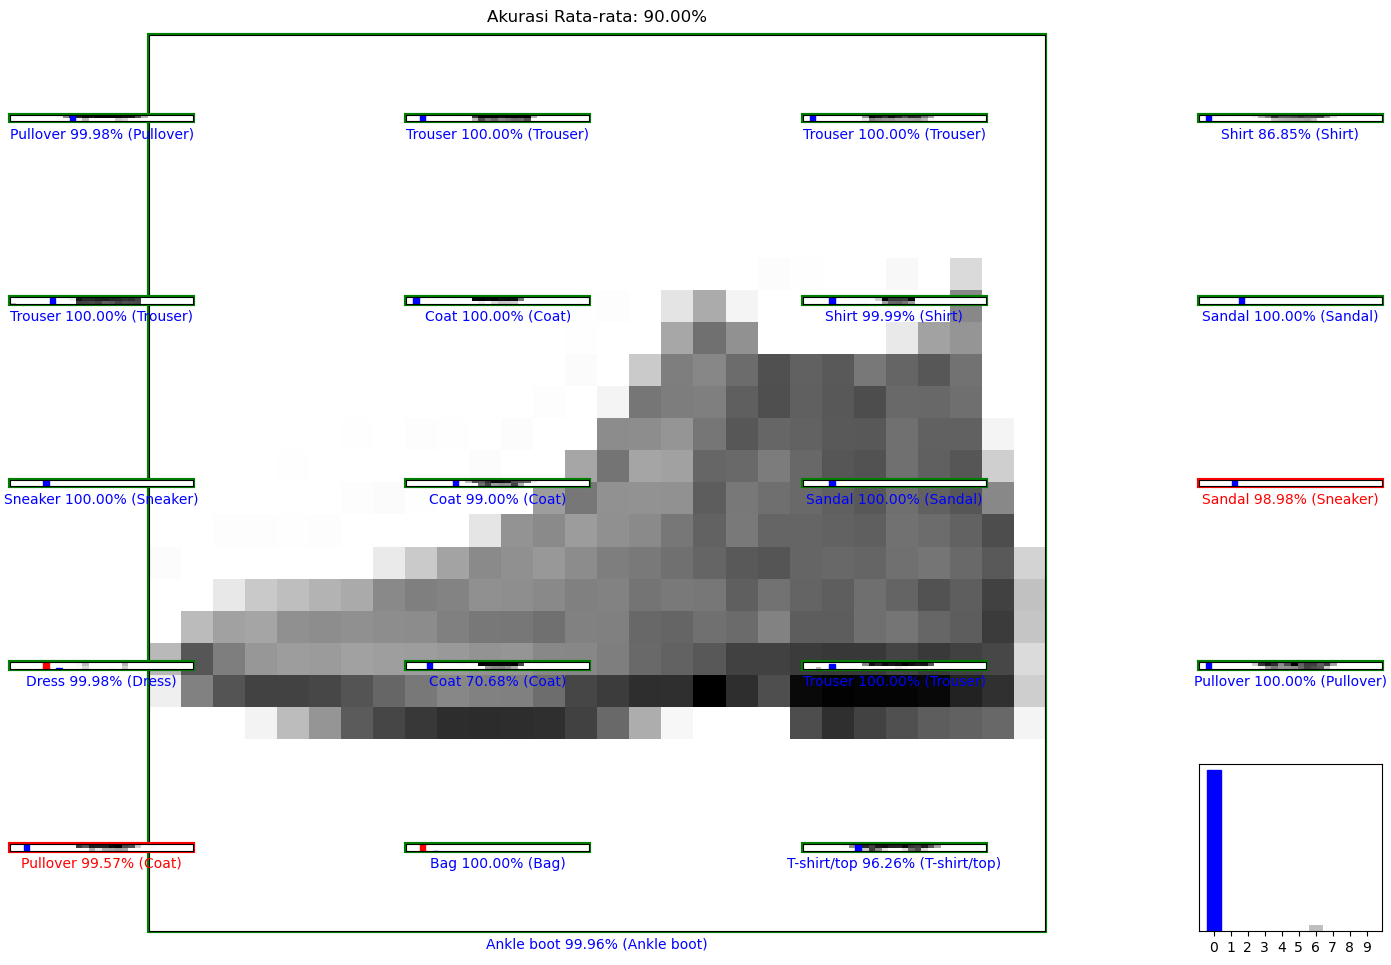

In [72]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_sklearn[i]) == test_labels.iloc[i] for i in range(num_images)]

average_accuracy = np.mean(correct_predictions) * 100

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plot_image(i, predictions_sklearn[i], test_labels, test_images)
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i,predictions_sklearn[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

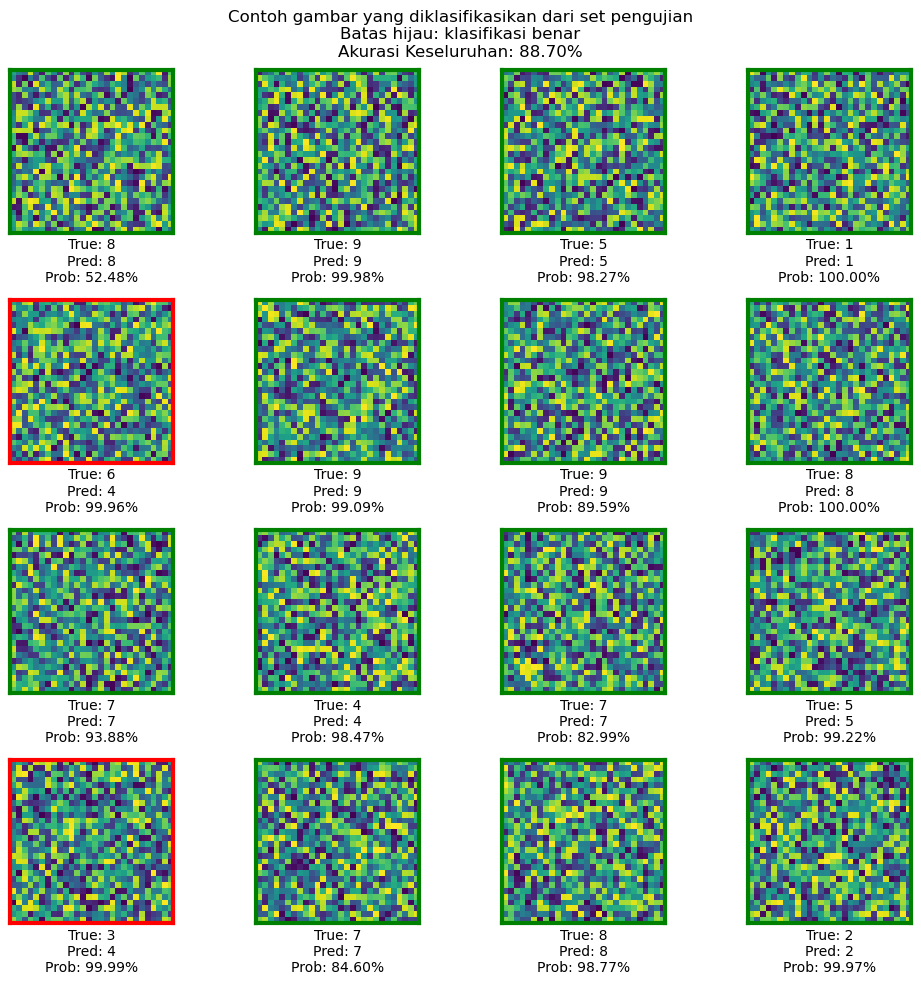

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_samples = 10000

df_test = pd.DataFrame({
    'Target': test_labels,  
    'Predicted': np.argmax(predictions_sklearn, axis=1),
    'Proba_0': predictions_sklearn[:, 0],
    'Proba_1': predictions_sklearn[:, 1]
})

df_test['Proba_0'] = df_test['Proba_0'] / (df_test['Proba_0'] + df_test['Proba_1'])
df_test['Proba_1'] = 1- df_test['Proba_0']

for i in range(1, 28*28 + 1):
    df_test[f'pixel{i}'] = np.random.randint(0, 256, n_samples)

df_plot = df_test.sample(16, random_state=84).copy()

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]

    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100
    true_class = df_plot['Target'].values[i]
    pixels = df_plot[[f'pixel{j}' for j in range(1, 28*28 + 1)]].values[i].reshape(28, 28)
    axi.imshow(pixels, cmap='viridis')
    axi.set(xticks=[], yticks=[],
            xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%")
    edge_color = 'green' if predicted_class == true_class else 'red'
    for spine in axi.spines.values():
        spine.set_edgecolor(edge_color)
        spine.set_linewidth(3)

fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')
fig.tight_layout()
plt.show()

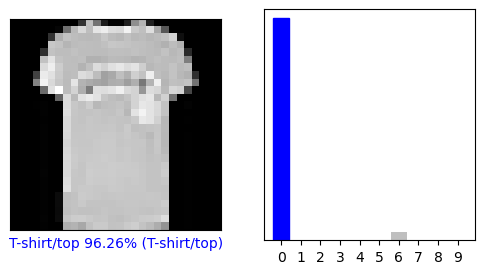

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray') 
    
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#77777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 19
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(i, predictions_sklearn[i], test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions_sklearn[i], test_labels)

plt.show()

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def save_image_only(i, true_label, img):
    img = img.iloc[i].values.reshape(28, 28)
    
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.savefig(f"image_only_{i}.jpeg", bbox_inches='tight', pad_inches=0)
    plt.close()

    i = 19
    save_image_only(i, test_labels, test_images)


In [76]:
import pandas as pd
data={
    'Model': ['TensorFlow', 'Scikit-Learn'],
    'Accuracy': [test_acc_tf, test_acc_sklearn],
    'Architecture': ['Neural Network (2 hiddenlayers)', 'MLP (2 hidden layer)'], 
    'Early Stopping': ['Yes', 'Yes']
}

comparison_df = pd.DataFrame(data)

best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]

print("Comparison of Model Performance:")
print(comparison_df)

print("\nBest Model Based on Accuracy:")
print(best_model)


Comparison of Model Performance:
          Model  Accuracy                     Architecture Early Stopping
0    TensorFlow    0.8845  Neural Network (2 hiddenlayers)            Yes
1  Scikit-Learn    0.8870             MLP (2 hidden layer)            Yes

Best Model Based on Accuracy:
Model                     Scikit-Learn
Accuracy                         0.887
Architecture      MLP (2 hidden layer)
Early Stopping                     Yes
Name: 1, dtype: object


In [83]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(model_sklearn, file)


In [78]:
# import pickle
# import tensorflow as tf
# #Cara dump h5 jika model tensorflow yang terbaik
# # Menyimpan model TensorFlow
# model_tf.save('best_model_tf.h5')
